##Installing Transformers library

In [ ]:
pip install transformers

In [2]:
import torch

## Load BERT-large


For Question Answering we use the `BertForQuestionAnswering` class from the `transformers` library.

For Question Answering, they have a version of BERT-large that has been fine-tuned for the SQuAD benchmark. 

BERT-large has 24-layers and an embedding size of 1,024, for a total of 340M parameters.


In [3]:
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Load the tokenizer.

In [4]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

## Wikipedia Scraper
Search in Wikipedia for a keyword then choose the result you interested in 

In [ ]:
pip install wikipedia

In [ ]:
pip install wikipedia-api

In [42]:
import wikipedia
import wikipediaapi

def wikiScraper():
  wiki_wiki = wikipediaapi.Wikipedia('en')

  f = False
  while not(f):
    search_in = input ("Search.. ")
    search_res = wikipedia.search(search_in)
    if len(search_res)>0:
      f = True

  print("Results:")
  for i in range(len(search_res)):
      print("Result #{}: {}".format(i , search_res[i]))

  f = False
  while not(f):
    choise = int( input("Choose result number wisely.."))
    if choise<=len(search_res):
      f=True


  page = wiki_wiki.page(search_res[choise])
  answer_text = page.summary

  print("Page - Title:\n %s" % page.title)
  print("Page - Summary:\n %s" % answer_text)
  return answer_text




## Convert text to Audio and Listen to it

We need to convert our text answer into audio. 

In [ ]:
pip install gTTS

In [12]:
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class


## Final Running Function

Turn the QA process into a function so we can easily try out other examples.

In [22]:
def answer_question(question, answer_text):
    '''
    Takes a `question` string and an `answer_text` string (which contains the
    answer), and identifies the words within the `answer_text` that are the
    answer. Prints them out.
    '''
    # ======== Tokenize ========
    # Apply the tokenizer to the input text, treating them as a text-pair.
    answer_text = tokenizer.tokenize(answer_text)
    if len(answer_text) > 512:
      answer_text = answer_text[:480]
    input_ids = tokenizer.encode(question, answer_text)

    # Report how long the input sequence is.
    print('Query has {:,} tokens.\n'.format(len(input_ids)))

    # ======== Set Segment IDs ========
    # Search the input_ids for the first instance of the `[SEP]` token.
    sep_index = input_ids.index(tokenizer.sep_token_id)

    # The number of segment A tokens includes the [SEP] token istelf.
    num_seg_a = sep_index + 1

    # The remainder are segment B.
    num_seg_b = len(input_ids) - num_seg_a

    # Construct the list of 0s and 1s.
    segment_ids = [0]*num_seg_a + [1]*num_seg_b

    # There should be a segment_id for every input token.
    assert len(segment_ids) == len(input_ids)

    # ======== Evaluate ========
    # Run our example question through the model.
    start_scores, end_scores = model(torch.tensor([input_ids]), # The tokens representing our input text.
                                    token_type_ids=torch.tensor([segment_ids]), return_dict=False) # The segment IDs to differentiate question from answer_text

    # ======== Reconstruct Answer ========
    # Find the tokens with the highest `start` and `end` scores.
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    # Get the string versions of the input tokens.
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    # Start with the first token.
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):
        
        # If it's a subword token, then recombine it with the previous token.
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        
        # Otherwise, add a space then the token.
        else:
            answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')
    return answer

In [23]:
import textwrap

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80) 

bert_abstract = wikiScraper()
print("Page - Summary:\n %s" % wrapper.fill(bert_abstract))

Search..  Switzerland


Results:
Result #0: Switzerland
Result #1: Swiss
Result #2: Languages of Switzerland
Result #3: Switzerland national football team
Result #4: Cantons of Switzerland
Result #5: Swiss cuisine
Result #6: Flag of Switzerland
Result #7: List of cities in Switzerland
Result #8: History of Switzerland
Result #9: Time in Switzerland


Choose Wisely.. 2


Page - Title:
 Languages of Switzerland
Page - Summary:
 The four national languages of Switzerland are German, French, Italian and Romansh. German, French and Italian maintain equal status as official languages at the national level within the Federal Administration of the Swiss Confederation, while Romansh is used in dealings with people who speak it.  In some situations, Latin is used, particularly as a single language to denote the country.
In 2017, the population of Switzerland was 62.6% native speakers of German (58.5% speak Swiss German and 11.1% Standard German at home); 22.9% French (mostly Swiss French, but including some Franco-Provençal dialects); 8.2% Italian (mostly Swiss Italian, but including Lombard dialects); and 0.5% Romansh.  The German region (Deutschschweiz) is roughly in the east, north and centre; the French part (la Romandie) in the west and the Italian area (Svizzera italiana) in the south. There remains a small Romansh-speaking native population in Grisons in

In [26]:
question = input ("What do you want to know.? ")

# voice_assistant(answer_question(question, bert_abstract))
answer = answer_question(question, bert_abstract)
tts = gTTS(answer) #Provide the string to convert to speech
tts.save('1.wav') #save the string converted to speech as a .wav file
sound_file = '1.wav'
Audio(sound_file, autoplay=True) 

What do you want to know.?  Which are the population percentages of Switzerland?


Query has 253 tokens.

Answer: "62 . 6 % native speakers of german ( 58 . 5 % speak swiss german and 11 . 1 % standard german at home ) ; 22 . 9 % french ( mostly swiss french , but including some franco - provencal dialects ) ; 8 . 2 % italian ( mostly swiss italian , but including lombard dialects ) ; and 0 . 5 % romansh"


## Results

We'll need to run the BERT tokenizer against both the `question` and the `answer_text`. To feed these into BERT, we actually concatenate them together and place the special [SEP] token in between.


In [27]:
answer_text = "62 . 6 % native speakers of german ( 58 . 5 % speak swiss german and 11 . 1 % standard german at home ) ; 22 . 9 % french ( mostly swiss french , but including some franco - provencal dialects ) ; 8 . 2 % italian ( mostly swiss italian , but including lombard dialects ) ; and 0 . 5 % romansh"

In [28]:
# Apply the tokenizer to the input text, treating them as a text-pair.
input_ids = tokenizer.encode(question, answer_text)

print('The input has a total of {:} tokens.'.format(len(input_ids)))

The input has a total of 82 tokens.


Just to see exactly what the tokenizer is doing, let's print out the tokens with their IDs.

In [29]:
# BERT only needs the token IDs, but for the purpose of inspecting the 
# tokenizer's behavior, let's also get the token strings and display them.
tokens = tokenizer.convert_ids_to_tokens(input_ids)

# For each token and its id...
for token, id in zip(tokens, input_ids):
    
    # If this is the [SEP] token, add some space around it to make it stand out.
    if id == tokenizer.sep_token_id:
        print('')
    
    # Print the token string and its ID in two columns.
    print('{:<12} {:>6,}'.format(token, id))

    if id == tokenizer.sep_token_id:
        print('')

[CLS]           101
which         2,029
are           2,024
the           1,996
population    2,313
percentage    7,017
##s           2,015
of            1,997
switzerland   5,288
?             1,029

[SEP]           102

62            5,786
.             1,012
6             1,020
%             1,003
native        3,128
speakers      7,492
of            1,997
german        2,446
(             1,006
58            5,388
.             1,012
5             1,019
%             1,003
speak         3,713
swiss         5,364
german        2,446
and           1,998
11            2,340
.             1,012
1             1,015
%             1,003
standard      3,115
german        2,446
at            2,012
home          2,188
)             1,007
;             1,025
22            2,570
.             1,012
9             1,023
%             1,003
french        2,413
(             1,006
mostly        3,262
swiss         5,364
french        2,413
,             1,010
but           2,021
including     2,16

We've concatenated the `question` and `answer_text` together, but BERT still needs a way to distinguish them. BERT has two special "Segment" embeddings, one for segment "A" and one for segment "B". Before the word embeddings go into the BERT layers, the segment A embedding needs to be added to the `question` tokens, and the segment B embedding needs to be added to each of the `answer_text` tokens. 

In [30]:
# Search the input_ids for the first instance of the `[SEP]` token.
sep_index = input_ids.index(tokenizer.sep_token_id)

# The number of segment A tokens includes the [SEP] token istelf.
num_seg_a = sep_index + 1

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a

# Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [1]*num_seg_b

# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)

We're ready to feed our example into the model!



In [33]:
# Run our example through the model.
start_scores, end_scores = model(torch.tensor([input_ids]), # The tokens representing our input text.
                                 token_type_ids=torch.tensor([segment_ids]),return_dict=False) # The segment IDs to differentiate question from answer_text


Now we can highlight the answer just by looking at the most probable start and end words. 

In [34]:
# Find the tokens with the highest `start` and `end` scores.
answer_start = torch.argmax(start_scores)
answer_end = torch.argmax(end_scores)

# Combine the tokens in the answer and print it out.
answer = ' '.join(tokens[answer_start:answer_end+1])

print('Answer: "' + answer + '"')

Answer: "62 . 6 % native speakers of german ( 58 . 5 % speak swiss german and 11 . 1 % standard german at home ) ; 22 . 9 % french ( mostly swiss french , but including some franco - proven ##cal dialects ) ; 8 . 2 % italian ( mostly swiss italian , but including lombard dialects ) ; and 0 . 5 % romans ##h"


 We can also reconstruct any words that got broken down into subwords.

In [35]:
# Start with the first token.
answer = tokens[answer_start]

# Select the remaining answer tokens and join them with whitespace.
for i in range(answer_start + 1, answer_end + 1):
    
    # If it's a subword token, then recombine it with the previous token.
    if tokens[i][0:2] == '##':
        answer += tokens[i][2:]
    
    # Otherwise, add a space then the token.
    else:
        answer += ' ' + tokens[i]

print('Answer: "' + answer + '"')

Answer: "62 . 6 % native speakers of german ( 58 . 5 % speak swiss german and 11 . 1 % standard german at home ) ; 22 . 9 % french ( mostly swiss french , but including some franco - provencal dialects ) ; 8 . 2 % italian ( mostly swiss italian , but including lombard dialects ) ; and 0 . 5 % romansh"


## Visualizing Scores

Generate bar plots showing the start and end scores for every word in the input.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

Retrieve all of the start and end scores, and use all of the tokens as x-axis labels.

In [37]:
# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))


Create a bar plot showing the score for every input word being the "start" word.

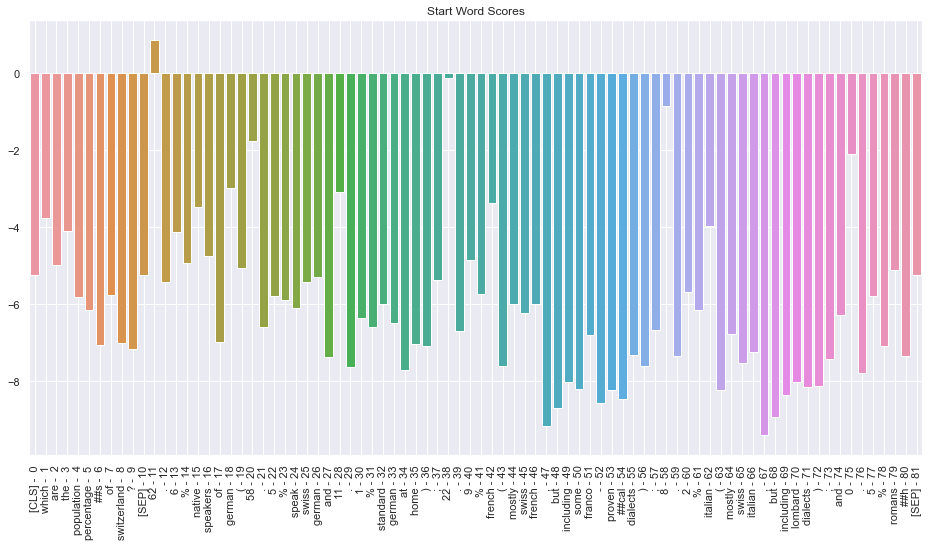

In [38]:
# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

Create a second bar plot showing the score for every input word being the "end" word.

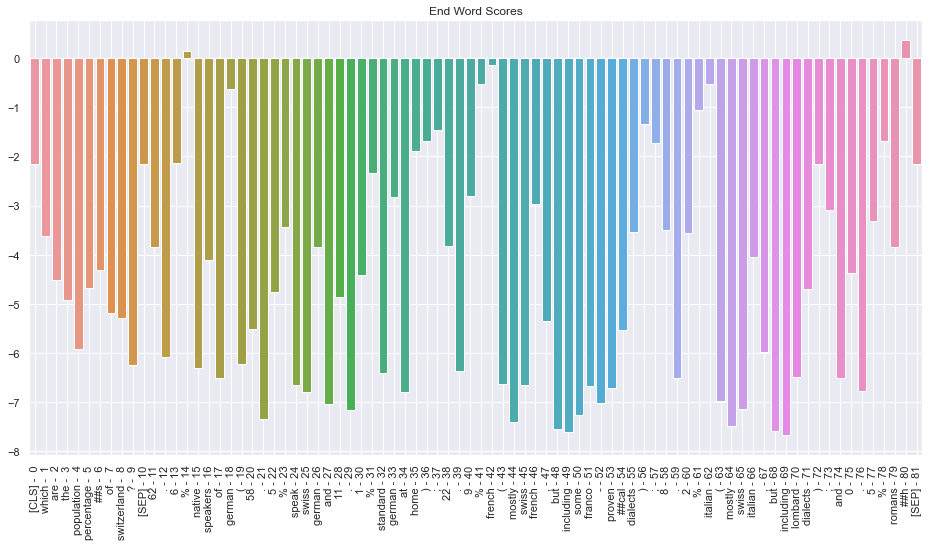

In [39]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()

## Alternate View

Visualizing both the start and end scores on a single bar plot, but we think it may actually be more confusing then seeing them separately. 

In [40]:
import pandas as pd

# Store the tokens and scores in a DataFrame. 
# Each token will have two rows, one for its start score and one for its end
# score. The "marker" column will differentiate them. A little wacky, I know.
scores = []
for (i, token_label) in enumerate(token_labels):

    # Add the token's start score as one row.
    scores.append({'token_label': token_label, 
                   'score': s_scores[i],
                   'marker': 'start'})
    
    # Add  the token's end score as another row.
    scores.append({'token_label': token_label, 
                   'score': e_scores[i],
                   'marker': 'end'})
    
df = pd.DataFrame(scores)


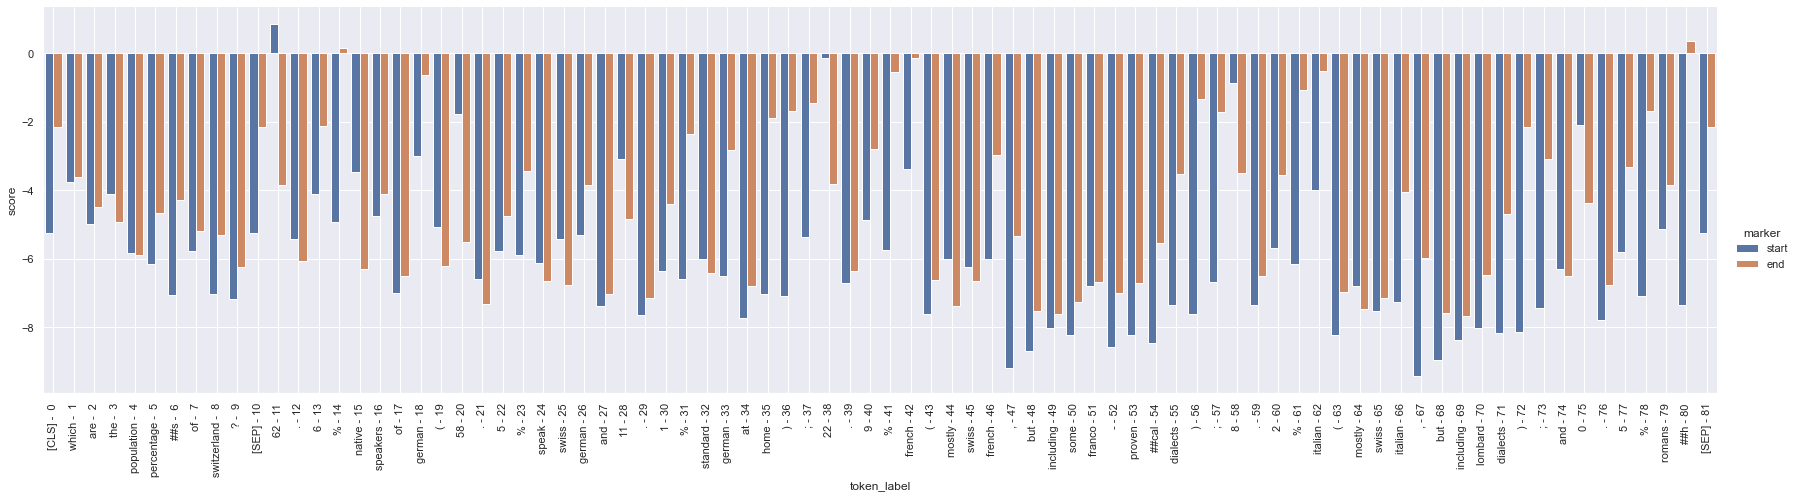

In [41]:
# Draw a grouped barplot to show start and end scores for each word.
# The "hue" parameter is where we tell it which datapoints belong to which
# of the two series.
g = sns.catplot(x="token_label", y="score", hue="marker", data=df,
                kind="bar", height=6, aspect=4)

# Turn the xlabels vertical.
g.set_xticklabels(g.ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
g.ax.grid(True)
